# Data Pre-Processing Assignment

### Brayan Gutierrez, Katie To, Jericka Ledezma
***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

## Reading Data

In [2]:
ground_water = pd.read_csv("ground_water_quality_2022_post.csv")
ground_water_df = pd.DataFrame(ground_water)
ground_water_df = ground_water_df.dropna()
print(ground_water_df)

      sno  district       mandal      village  lat_gis  long_gis  RL_GIS  \
0       1  ADILABAD     Adilabad     Adilabad    78.52     19.67   253.0   
1       2  ADILABAD  Bazarhatnur  Bazarhatnur    78.35     19.46   435.0   
2       3  ADILABAD         Bela   Chandpally    78.85     19.68   247.0   
3       4  ADILABAD     Bheempur         Arli    78.38     19.83   224.0   
4       5  ADILABAD     Bheempur     Bheempur    78.42     19.77   245.0   
...   ...       ...          ...          ...      ...       ...     ...   
1019   31   YADADRI    Valigonda   T. somaram    78.95     17.40   339.0   
1020   32   YADADRI    Valigonda  Varkatpally    78.93     17.34   339.0   
1021   33   YADADRI    Valigonda  Vemulakonda    79.14     17.35   265.0   
1022   34   YADADRI      Y.Gutta   Mallapuram    78.91     17.63   439.0   
1023   35   YADADRI      Y.Gutta   Motakondur    79.03     17.55   342.0   

                 season    pH     E.C  ...    SO4     Na     K     Ca    Mg  \
0     Po

## Data Cleaning
***

In [3]:
ground_water_df['pH'] = pd.to_numeric(ground_water_df['pH'], errors='coerce')
ground_water_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 817 entries, 0 to 1023
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sno               817 non-null    int64  
 1   district          817 non-null    object 
 2   mandal            817 non-null    object 
 3   village           817 non-null    object 
 4   lat_gis           817 non-null    float64
 5   long_gis          817 non-null    float64
 6   RL_GIS            817 non-null    float64
 7   season            817 non-null    object 
 8   pH                817 non-null    float64
 9   E.C               817 non-null    float64
 10  TDS               817 non-null    float64
 11  CO3               817 non-null    float64
 12  HCO3              817 non-null    float64
 13  Cl                817 non-null    float64
 14  F                 817 non-null    float64
 15  NO3               817 non-null    float64
 16  SO4               817 non-null    float64
 

### Separating Numeric and Non-numeric Columns

In [4]:
ground_water_df = ground_water_df.rename(columns = {'NO3 ': 'NO3'})
ground_water_df = ground_water_df.rename(columns = {'RSC  meq  / L': 'RSC'})
numeric = ground_water_df.select_dtypes(include=['number']).columns
nonnumeric = ground_water_df.select_dtypes(exclude=['number']).columns

print(numeric)
print(nonnumeric)

Index(['sno', 'lat_gis', 'long_gis', 'RL_GIS', 'pH', 'E.C', 'TDS', 'CO3',
       'HCO3', 'Cl', 'F', 'NO3', 'SO4', 'Na', 'K', 'Ca', 'Mg', 'T.H', 'SAR',
       'RSC'],
      dtype='object')
Index(['district', 'mandal', 'village', 'season', 'Classification',
       'Classification.1'],
      dtype='object')


### Finding Missing Data

In [5]:
ground_water_df[nonnumeric].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 817 entries, 0 to 1023
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   district          817 non-null    object
 1   mandal            817 non-null    object
 2   village           817 non-null    object
 3   season            817 non-null    object
 4   Classification    817 non-null    object
 5   Classification.1  817 non-null    object
dtypes: object(6)
memory usage: 44.7+ KB


In [6]:
ground_water_df[numeric].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 817 entries, 0 to 1023
Data columns (total 20 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sno       817 non-null    int64  
 1   lat_gis   817 non-null    float64
 2   long_gis  817 non-null    float64
 3   RL_GIS    817 non-null    float64
 4   pH        817 non-null    float64
 5   E.C       817 non-null    float64
 6   TDS       817 non-null    float64
 7   CO3       817 non-null    float64
 8   HCO3      817 non-null    float64
 9   Cl        817 non-null    float64
 10  F         817 non-null    float64
 11  NO3       817 non-null    float64
 12  SO4       817 non-null    float64
 13  Na        817 non-null    float64
 14  K         817 non-null    float64
 15  Ca        817 non-null    float64
 16  Mg        817 non-null    float64
 17  T.H       817 non-null    float64
 18  SAR       817 non-null    float64
 19  RSC       817 non-null    float64
dtypes: float64(19), int64(1)
memory

### No missing data!!

## Outlier Detection

### We will be using histograms and boxplots for each numeric variable to determine any possible outliers:

#### Serial Number (sno)

<AxesSubplot:>

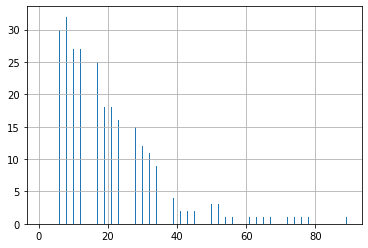

In [7]:
ground_water_df['sno'].hist(bins = 1000)

<AxesSubplot:>

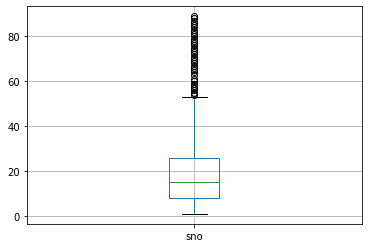

In [8]:
ground_water_df.boxplot(column=['sno'])

#### Lattitude (lat_gis)

<AxesSubplot:>

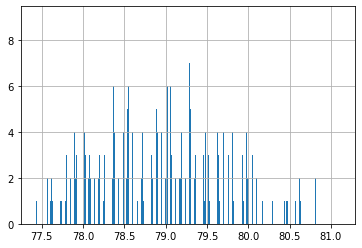

In [9]:
ground_water_df['lat_gis'].hist(bins = 1000)

<AxesSubplot:>

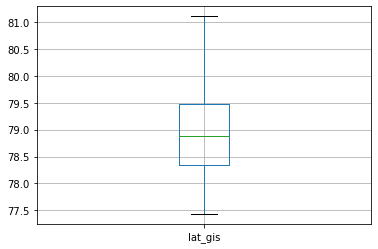

In [10]:
ground_water_df.boxplot(column=['lat_gis'])

#### Longitude (long_gis)

<AxesSubplot:>

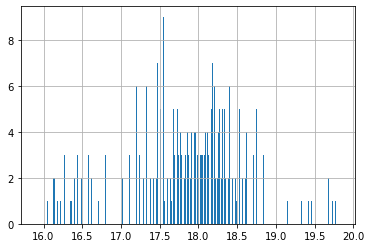

In [11]:
ground_water_df['long_gis'].hist(bins = 1000)

<AxesSubplot:>

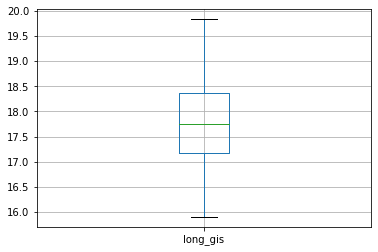

In [12]:
ground_water_df.boxplot(column=['long_gis'])

#### Ground Water Level (gwl)

<AxesSubplot:>

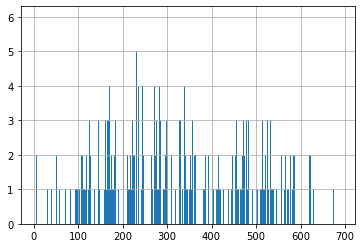

In [13]:
ground_water_df['RL_GIS'].hist(bins = 1000)

<AxesSubplot:>

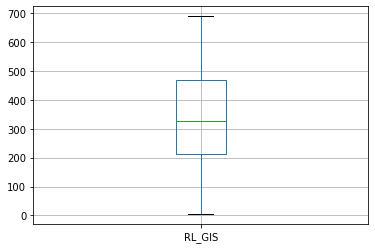

In [14]:
ground_water_df.boxplot(column=['RL_GIS'])

#### pH

<AxesSubplot:>

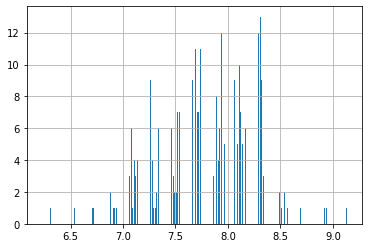

In [15]:
ground_water_df['pH'].hist(bins = 1000)

<AxesSubplot:>

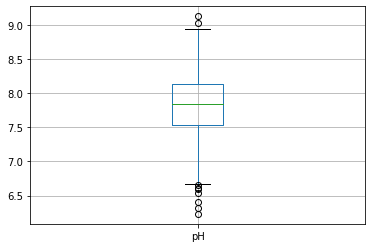

In [16]:
ground_water_df.boxplot(column=['pH'])

#### Electrical Conductivity (E.C)

<AxesSubplot:>

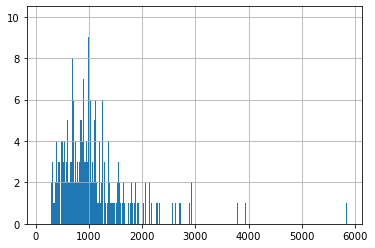

In [17]:
ground_water_df['E.C'].hist(bins = 1000)

<AxesSubplot:>

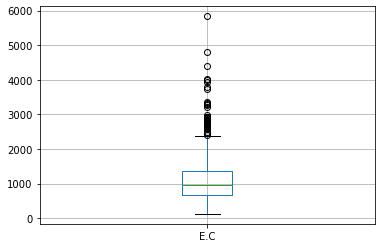

In [18]:
ground_water_df.boxplot(column=['E.C'])

#### Total Dissolved Solids (TDS)

<AxesSubplot:>

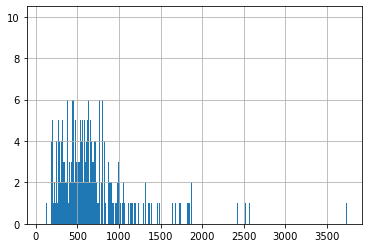

In [19]:
ground_water_df['TDS'].hist(bins = 1000)

<AxesSubplot:>

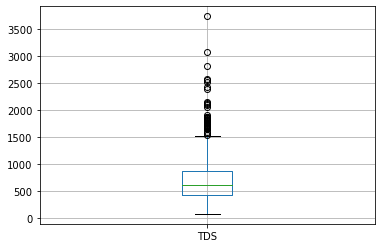

In [20]:
ground_water_df.boxplot(column=['TDS'])

#### Carbonate Present (CO3)

<AxesSubplot:>

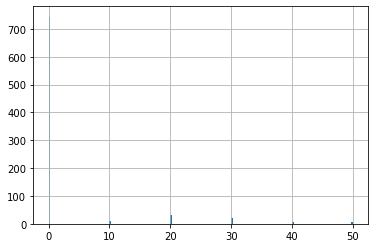

In [21]:
ground_water_df['CO3'].hist(bins = 200)

<AxesSubplot:>

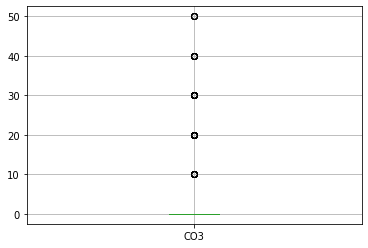

In [22]:
ground_water_df.boxplot(column=['CO3'])

#### Bicarbonate Present (HCO3)

<AxesSubplot:>

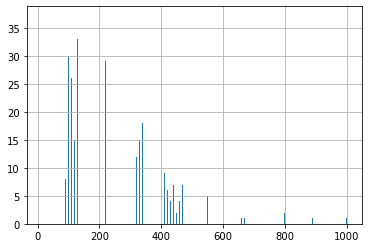

In [23]:
ground_water_df['HCO3'].hist(bins = 1000)

<AxesSubplot:>

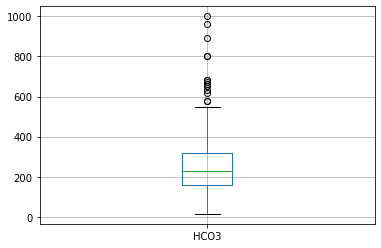

In [24]:
ground_water_df.boxplot(column=['HCO3'])

#### Chloride Present (Cl)

<AxesSubplot:>

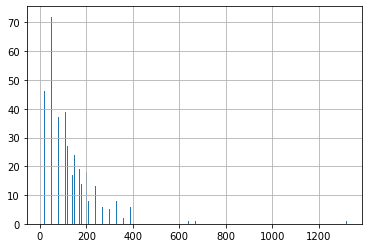

In [25]:
ground_water_df['Cl'].hist(bins = 1000)

<AxesSubplot:>

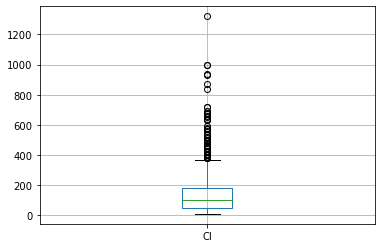

In [26]:
ground_water_df.boxplot(column=['Cl'])

#### Flouride Present (F)

<AxesSubplot:>

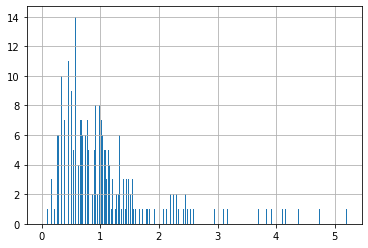

In [27]:
ground_water_df['F'].hist(bins = 1000)

<AxesSubplot:>

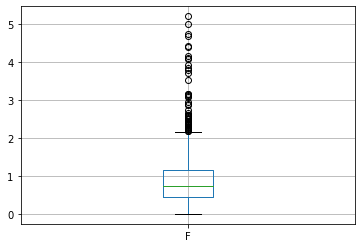

In [28]:
ground_water_df.boxplot(column=['F'])

#### Nitrate Present (NO3)

<AxesSubplot:>

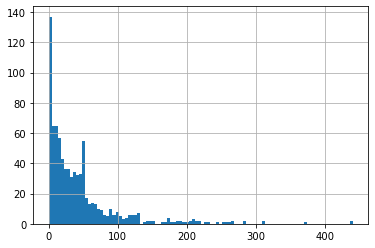

In [29]:
ground_water_df['NO3'].hist(bins = 100)

<AxesSubplot:>

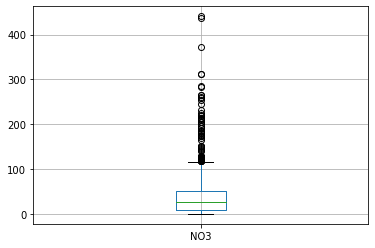

In [30]:
ground_water_df.boxplot(column=['NO3'])

#### Sulphate Present (SO4)

<AxesSubplot:>

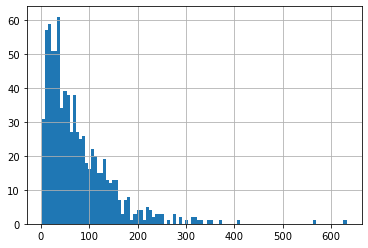

In [31]:
ground_water_df['SO4'].hist(bins = 100)

<AxesSubplot:>

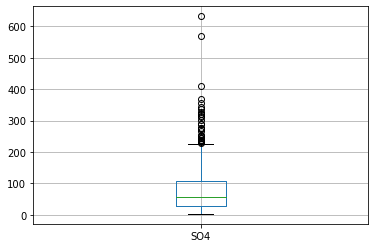

In [32]:
ground_water_df.boxplot(column=['SO4'])

#### Sodium Present (Na)

<AxesSubplot:>

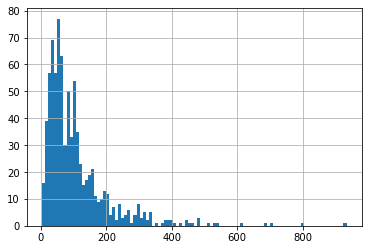

In [33]:
ground_water_df['Na'].hist(bins = 100)

<AxesSubplot:>

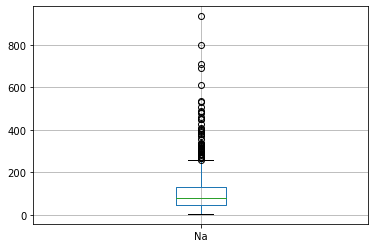

In [34]:
ground_water_df.boxplot(column=['Na'])

#### Potassium Present (K)

<AxesSubplot:>

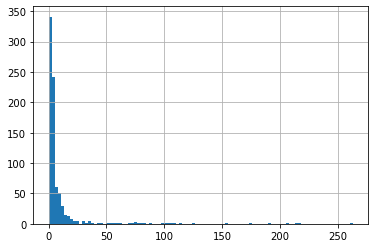

In [35]:
ground_water_df['K'].hist(bins = 100)

<AxesSubplot:>

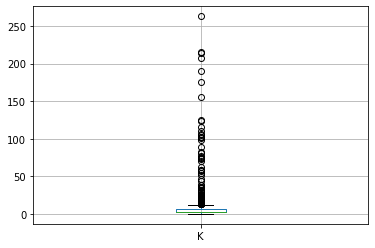

In [36]:
ground_water_df.boxplot(column=['K'])

#### Calcium Present (Ca)

<AxesSubplot:>

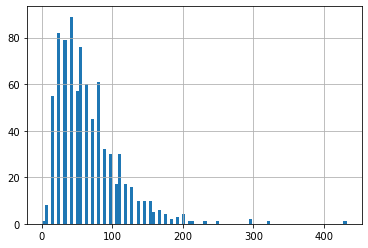

In [37]:
ground_water_df['Ca'].hist(bins = 100)

<AxesSubplot:>

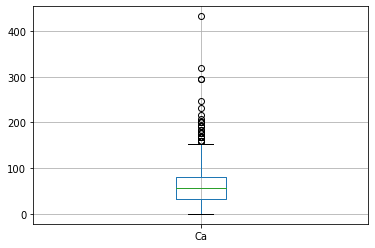

In [38]:
ground_water_df.boxplot(column=['Ca'])

#### Magnessium Present (Mg)

<AxesSubplot:>

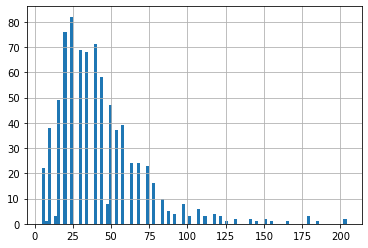

In [39]:
ground_water_df['Mg'].hist(bins = 100)

<AxesSubplot:>

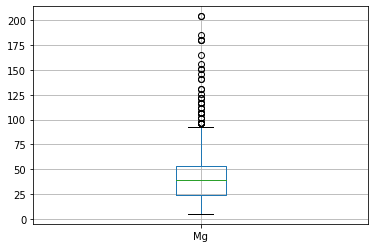

In [40]:
ground_water_df.boxplot(column=['Mg'])

#### Total Hardness (T.H)

<AxesSubplot:>

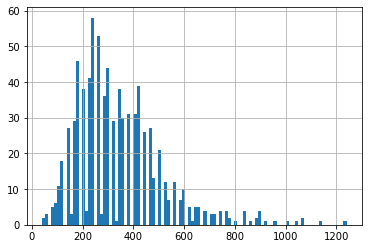

In [41]:
ground_water_df['T.H'].hist(bins = 100)

<AxesSubplot:>

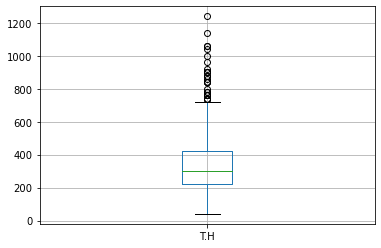

In [42]:
ground_water_df.boxplot(column=['T.H'])

#### Sodium Adsoption Ratio (SAR)

<AxesSubplot:>

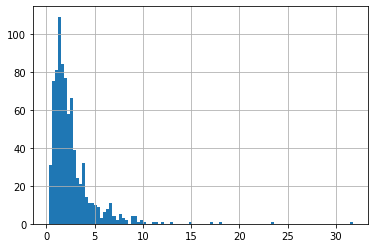

In [43]:
ground_water_df['SAR'].hist(bins = 100)

<AxesSubplot:>

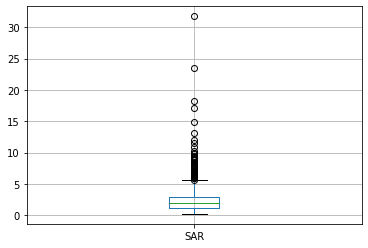

In [44]:
ground_water_df.boxplot(column=['SAR'])

#### Residual Sodium Carbonate (RSC)

<AxesSubplot:>

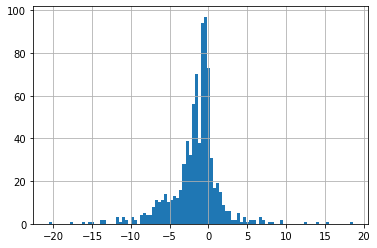

In [45]:
ground_water_df['RSC'].hist(bins = 100)

<AxesSubplot:>

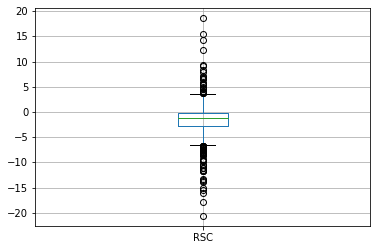

In [46]:
ground_water_df.boxplot(column=['RSC'])

## Outlier Treatment: Flooring (1st Percentile) and Capping (99th Percentile)

In [47]:
for num in numeric:
    Q1 = ground_water_df[num].quantile(0.25)
    Q3 = ground_water_df[num].quantile(0.75)
    IQR = Q3 - Q1
    whisker_width = 1.5
    lower_whisker = Q1 -(whisker_width*IQR)
    upper_whisker = Q3 + (whisker_width*IQR)
    ground_water_df[num]=np.where(ground_water_df[num]>upper_whisker,upper_whisker,np.where(ground_water_df[num]<lower_whisker,lower_whisker,ground_water_df[num]))

<AxesSubplot:>

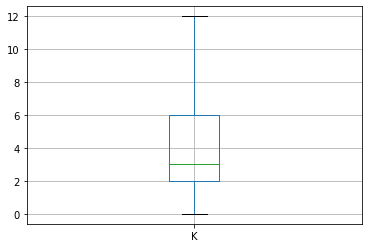

In [48]:
ground_water_df.boxplot(column=['K'])

<AxesSubplot:>

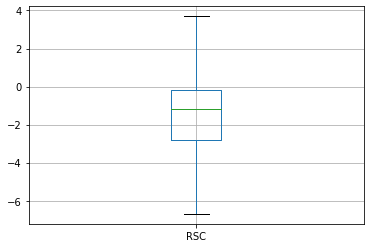

In [49]:
ground_water_df.boxplot(column=['RSC'])

## Unnecessary Data

In [50]:
num_rows = len(ground_water_df)

for col in ground_water_df.columns:
    cnts = ground_water_df[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    
    if top_pct > 0.999:
        print('{0}: {1:.2f}%'.format(col, top_pct*100))
        print(cnts)
        print()

#deleted the season column
ground_water_df = ground_water_df.drop(columns=['season'])
new_nonnumeric = ground_water_df.select_dtypes(exclude=['number']).columns

# Removing CO3
ground_water_df = ground_water_df.drop(columns=['CO3'])
new_numeric = ground_water_df.select_dtypes(include=['number']).columns

season: 100.00%
Post-monsoon 2021    817
Name: season, dtype: int64

CO3: 100.00%
0.0    817
Name: CO3, dtype: int64



In [51]:
print(new_nonnumeric)

Index(['district', 'mandal', 'village', 'Classification', 'Classification.1'], dtype='object')


In [52]:
ground_water_df[ground_water_df.duplicated()]

,sno,district,mandal,village,lat_gis,long_gis,RL_GIS,pH,E.C,TDS,...,SO4,Na,K,Ca,Mg,T.H,SAR,Classification,RSC,Classification.1


# Feature Selection
***

In [53]:
# Normalizing Data
scaled_df = normalize(ground_water_df[new_numeric])
ground_water_df[new_numeric] = scaled_df

ground_water_df[new_numeric].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 817 entries, 0 to 1023
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sno       817 non-null    float64
 1   lat_gis   817 non-null    float64
 2   long_gis  817 non-null    float64
 3   RL_GIS    817 non-null    float64
 4   pH        817 non-null    float64
 5   E.C       817 non-null    float64
 6   TDS       817 non-null    float64
 7   HCO3      817 non-null    float64
 8   Cl        817 non-null    float64
 9   F         817 non-null    float64
 10  NO3       817 non-null    float64
 11  SO4       817 non-null    float64
 12  Na        817 non-null    float64
 13  K         817 non-null    float64
 14  Ca        817 non-null    float64
 15  Mg        817 non-null    float64
 16  T.H       817 non-null    float64
 17  SAR       817 non-null    float64
 18  RSC       817 non-null    float64
dtypes: float64(19)
memory usage: 127.7 KB


## Numerical Input → Categorical Output
#### ANOVA

In [54]:
# Numerical Inputs
X = ground_water_df[new_numeric]
# Categorical Output
y = ground_water_df['Classification.1']

In [55]:
# Splitting Data 60% Training 40% Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(571, 19) (571,)
(246, 19) (246,)


Feature 0: 1.856230
Feature 1: 7.768318
Feature 2: 7.933554
Feature 3: 7.325287
Feature 4: 7.236906
Feature 5: 6.979295
Feature 6: 6.995516
Feature 7: 21.291977
Feature 8: 3.571358
Feature 9: 3.842542
Feature 10: 3.262075
Feature 11: 0.970692
Feature 12: 71.330751
Feature 13: 2.062168
Feature 14: 31.174045
Feature 15: 17.134111
Feature 16: 109.872189
Feature 17: 58.852243
Feature 18: 145.949820


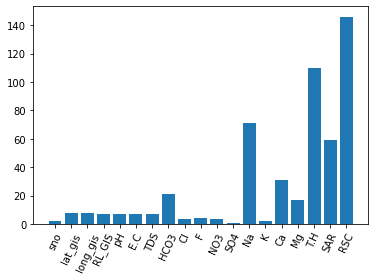

In [56]:
# ANOVA Feature Selection
fs = SelectKBest(score_func = f_classif, k='all')
fs.fit(X_train, y_train)
X_train_fs = fs.transform(X_train)
X_test_fs = fs.transform(X_test)

# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
    
idx = np.arange(len(new_numeric))
labels = ground_water_df[new_numeric][:len(new_numeric)]

plt.bar(idx, fs.scores_)
plt.xticks(idx, labels, rotation=65)  # Rotate labels if needed
plt.show()

#### Mutual Information Feature Selection

Feature 0: 0.016274
Feature 1: 0.019690
Feature 2: 0.032732
Feature 3: 0.002003
Feature 4: 0.018749
Feature 5: 0.022669
Feature 6: 0.024781
Feature 7: 0.040154
Feature 8: 0.016828
Feature 9: 0.029433
Feature 10: 0.000000
Feature 11: 0.024817
Feature 12: 0.132624
Feature 13: 0.011709
Feature 14: 0.074612
Feature 15: 0.039701
Feature 16: 0.133404
Feature 17: 0.091314
Feature 18: 0.243656


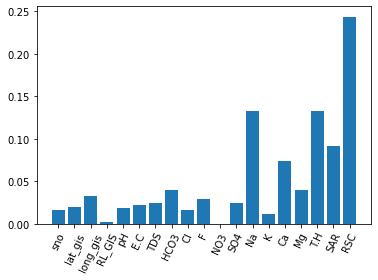

In [57]:
# Mutual Information Feature Selection
fs = SelectKBest(score_func = mutual_info_classif, k='all')
fs.fit(X_train, y_train)
X_train_fs = fs.transform(X_train)
X_test_fs = fs.transform(X_test)

# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
    
idx = np.arange(len(new_numeric))
labels = ground_water_df[new_numeric][:len(new_numeric)]

plt.bar(idx, fs.scores_)
plt.xticks(idx, labels, rotation=65)  # Rotate labels if needed
plt.show()

#### Recursive Feature Elimination (RFE) Method

In [58]:
# Create a dataset with features (X) and target variable (y)
X = ground_water_df[new_numeric]
y = ground_water_df['Classification.1']

# Create a base model for feature elimination
model = LogisticRegression()

# Create the RFE object with the base model
rfe = RFE(estimator=model, n_features_to_select=5)  # specify the number of features to select

# Fit RFE to the data
rfe.fit(X, y)

# Get the rankings of features
ranked_features = rfe.ranking_

# Print the ranked features
for feature_rank, feature_name in sorted(zip(ranked_features, X.columns)):
    print("Feature:", feature_name, "Rank:", feature_rank)

Feature: Cl Rank: 1
Feature: HCO3 Rank: 1
Feature: Na Rank: 1
Feature: RL_GIS Rank: 1
Feature: T.H Rank: 1
Feature: Ca Rank: 2
Feature: E.C Rank: 3
Feature: lat_gis Rank: 4
Feature: Mg Rank: 5
Feature: TDS Rank: 6
Feature: NO3 Rank: 7
Feature: SO4 Rank: 8
Feature: long_gis Rank: 9
Feature: RSC Rank: 10
Feature: sno Rank: 11
Feature: pH Rank: 12
Feature: SAR Rank: 13
Feature: K Rank: 14
Feature: F Rank: 15


#### Chi Square

Feature 0: 438.356298
Feature 1: 2063.205298
Feature 2: 2127.914793
Feature 3: 1394.992108
Feature 4: 1778.844087
Feature 5: 2143.652948
Feature 6: 2158.706013
Feature 7: 3441.183769
Feature 8: 814.782487
Feature 9: 833.686438
Feature 10: 586.902643
Feature 11: 201.568661
Feature 12: 7983.995174
Feature 13: 256.114510
Feature 14: 5721.772378
Feature 15: 2972.923561
Feature 16: 8762.269818
Feature 17: 7139.196767
Feature 18: 9514.218516


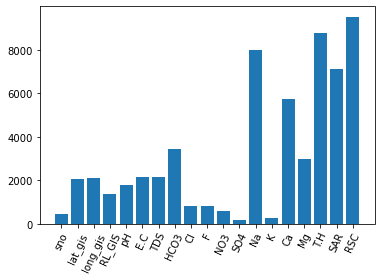

In [59]:
# prepare input data
def prepare_inputs(X_train, X_test):
    oe = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
    oe.fit(X_train)
    X_train_enc = oe.transform(X_train)
    X_test_enc = oe.transform(X_test)
    return X_train_enc, X_test_enc
 
# prepare target
def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
    return y_train_enc, y_test_enc
 
# feature selection
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=chi2, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

#chi squared with numeric features
X = ground_water_df[new_numeric]
y = ground_water_df['Classification.1']

X = X.astype(str)
 
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train_enc, y_train_enc, X_test_enc)
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
idx = np.arange(len(new_numeric))
labels = ground_water_df[new_numeric][:len(new_numeric)]

plt.bar(idx, fs.scores_)
plt.xticks(idx, labels, rotation=65)  # Rotate labels if needed
plt.show()

## Categorical Input → Categorical Output

#### Chi Square

Feature 0: 4.111736
Feature 1: 401.197109
Feature 2: 454.765318
Feature 3: 29.721566


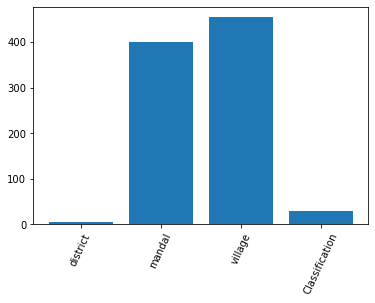

In [60]:
#chi squared with non-numeric features
features = ['district', 'mandal','village', 'Classification']
X = ground_water_df[features]
y = ground_water_df['Classification.1']

X = X.astype(str)
 
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train_enc, y_train_enc, X_test_enc)
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
idx = np.arange(len(features))
labels = ground_water_df[new_numeric][:4]

plt.bar(idx, fs.scores_)
plt.xticks(idx, features, rotation=65)
plt.show()

# Principal Component Analysis
***

In [61]:
chosen_features = ['RSC', 'SAR', 'T.H', 'Mg', 'Ca', 'Na', 'HCO3', 'E.C', 'TDS', 'mandal', 'village', 'Classification.1']

working_gw_df = ground_water_df[chosen_features]
working_gw_df.head()

working_numeric = working_gw_df.select_dtypes(include=['number']).columns
working_nonnumeric = working_gw_df.select_dtypes(exclude=['number']).columns

working_gw_df[working_numeric]

,RSC,SAR,T.H,Mg,Ca,Na,HCO3,E.C,TDS
0,-0.002170,0.001374,0.274824,0.038331,0.046286,0.061474,0.166341,0.770230,0.493236
1,-0.000846,0.001672,0.126964,0.021161,0.016929,0.029625,0.084643,0.258160,0.165053
2,0.001619,0.002679,0.194265,0.027521,0.032377,0.095513,0.275208,0.764917,0.489709
3,-0.000151,0.001970,0.226471,0.036990,0.030196,0.078510,0.218922,0.776041,0.496726
4,-0.001111,0.001299,0.263879,0.034027,0.049998,0.058331,0.208326,0.770806,0.493038
...,...,...,...,...,...,...,...,...,...
1019,0.000120,0.002295,0.204266,0.011415,0.062481,0.097327,0.210274,0.773208,0.495045
1020,-0.002312,0.001264,0.248597,0.020026,0.052482,0.079068,0.131204,0.788606,0.504791
1021,-0.002226,0.001429,0.239321,0.020941,0.050523,0.086089,0.086421,0.796739,0.509886
1022,0.000485,0.001491,0.266597,0.018177,0.077555,0.050896,0.290833,0.618019,0.395048


In [62]:
pca = PCA(n_components=2)

principalComponents = pca.fit_transform(working_gw_df[working_numeric])

principalDf = pd.DataFrame(data=principalComponents, columns=['principal component 1', 'principal component 2'])

In [63]:
finalDf = pd.concat([principalDf, working_gw_df[['Classification.1']]], axis = 1)
print(finalDf)

      principal component 1  principal component 2 Classification.1
0                 -0.035005              -0.022649             P.S.
1                  0.467570               0.347021             P.S.
2                 -0.027613              -0.053718               MR
3                 -0.043519              -0.035534             P.S.
4                 -0.025916              -0.048813             P.S.
...                     ...                    ...              ...
1019                    NaN                    NaN             P.S.
1020                    NaN                    NaN             P.S.
1021                    NaN                    NaN             P.S.
1022                    NaN                    NaN             P.S.
1023                    NaN                    NaN             P.S.

[999 rows x 3 columns]


P.S.
P.S.
KeyError: 'P.S.'
MR
KeyError: 'MR'
U.S.
KeyError: 'U.S.'


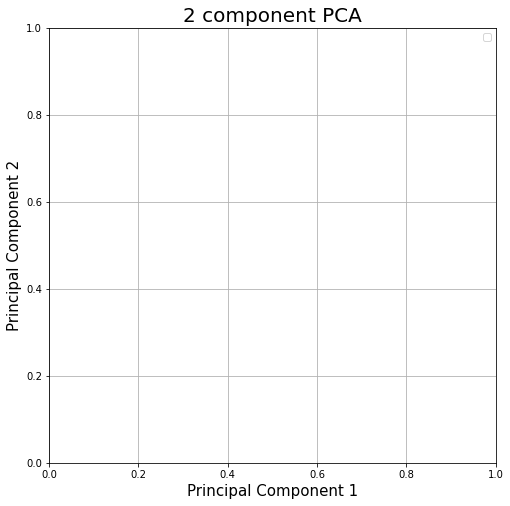

In [64]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1', fontsize=15)
ax.set_ylabel('Principal Component 2', fontsize=15)
ax.set_title('2 component PCA', fontsize=20)

targets = []

for i in working_gw_df['Classification.1']:
    if i not in targets:
        targets.append(i)

print(targets[0])

colors = ['r', 'g', 'b']

for target, color in zip(targets, colors):
    print(target)
    try:
        indicesToKeep = finalDf[target] == target  # Assuming target is the column name
        ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'],
                   finalDf.loc[indicesToKeep, 'principal component 2'],
                   c=color,
                   s=50)
    except KeyError as e:
        print(f"KeyError: {e}")
        continue  # Skip this target if it doesn't exist in finalDf

ax.legend(targets)
ax.grid()
plt.show()

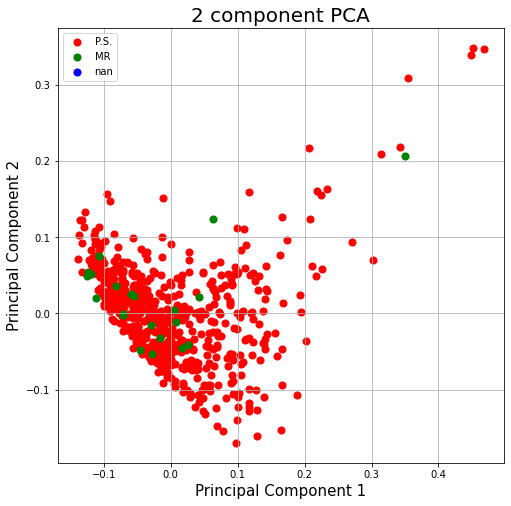

In [65]:
principalComponents = pca.fit_transform(working_gw_df[working_numeric])

principalDf = pd.DataFrame(data=principalComponents, columns=['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, working_gw_df[['Classification.1']]], axis=1)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1', fontsize=15)
ax.set_ylabel('Principal Component 2', fontsize=15)
ax.set_title('2 component PCA', fontsize=20)

targets = finalDf['Classification.1'].unique()

colors = ['r', 'g', 'b']

for target, color in zip(targets, colors):
    indicesToKeep = finalDf['Classification.1'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'],
               finalDf.loc[indicesToKeep, 'principal component 2'],
               c=color,
               s=50,
               label=target)

ax.legend()
ax.grid()
plt.show()